<a href="https://colab.research.google.com/github/Sahilghagg/Weather-Predictor/blob/main/whether_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

In [3]:
weather_df = pd.read_csv('/content/drive/MyDrive/crazy/kanpur.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head(5)


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,11,21,17,50,0.0,1015,11,10,320,10
2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,22,11,52,0.0,1015,11,10,315,11
2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,6,55,0.0,1015,11,10,310,11
2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,0,57,0.0,1015,10,10,304,12
2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,14,19,0,54,0.0,1016,11,10,302,11


In [4]:

weather_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [5]:

weather_df.shape

(96432, 24)

In [6]:

weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.00000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,33.400199,22.374564,0.0,11.037805,6.877053,4.465012,46.094077,13.230629,30.735783,30.86884,29.088384,14.211766,16.993550,44.370479,0.037756,1006.217946,27.429577,9.885214,205.537270,9.734092
std,6.994211,7.635253,0.0,2.152973,1.551294,3.414374,31.249725,8.053778,9.320398,9.17754,8.051981,6.926605,23.150025,22.484991,0.307143,7.593850,8.459575,1.058515,104.369548,4.835331
min,15.000000,3.000000,0.0,4.000000,3.000000,1.000000,0.000000,-14.000000,4.000000,7.00000,4.000000,0.000000,0.000000,2.000000,0.000000,986.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,16.000000,0.0,8.700000,6.000000,1.000000,18.000000,7.000000,24.000000,25.00000,24.000000,9.000000,0.000000,26.000000,0.000000,1000.000000,21.000000,10.000000,101.000000,6.000000
50%,34.000000,24.000000,0.0,11.600000,7.000000,5.000000,46.000000,12.000000,31.000000,31.00000,29.000000,14.000000,5.000000,42.000000,0.000000,1006.000000,28.000000,10.000000,240.000000,9.000000
75%,38.000000,28.000000,0.0,13.000000,8.000000,8.000000,73.000000,21.000000,38.000000,38.00000,35.000000,18.000000,27.000000,61.000000,0.000000,1013.000000,33.000000,10.000000,299.000000,12.000000
max,51.000000,39.000000,0.0,13.900000,11.000000,11.000000,100.000000,31.000000,65.000000,65.00000,54.000000,75.000000,100.000000,100.000000,20.600000,1024.000000,50.000000,20.000000,360.000000,47.000000


In [7]:
weather_df.isnull().any()

,0
maxtempC,False
mintempC,False
totalSnow_cm,False
sunHour,False
uvIndex,False
uvIndex.1,False
moon_illumination,False
moonrise,False
moonset,False
sunrise,False


In [8]:
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
weather_df_num.head()


,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2009-01-01 00:00:00,24,10,17,50,11,8.7,12,0.0,1015,10
2009-01-01 01:00:00,24,10,11,52,11,8.7,13,0.0,1015,11
2009-01-01 02:00:00,24,10,6,55,11,8.7,13,0.0,1015,11
2009-01-01 03:00:00,24,10,0,57,10,8.7,13,0.0,1015,12
2009-01-01 04:00:00,24,10,0,54,11,8.7,14,0.0,1016,11


In [9]:

weather_df_num.shape

(96432, 10)

In [10]:
weather_df_num.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

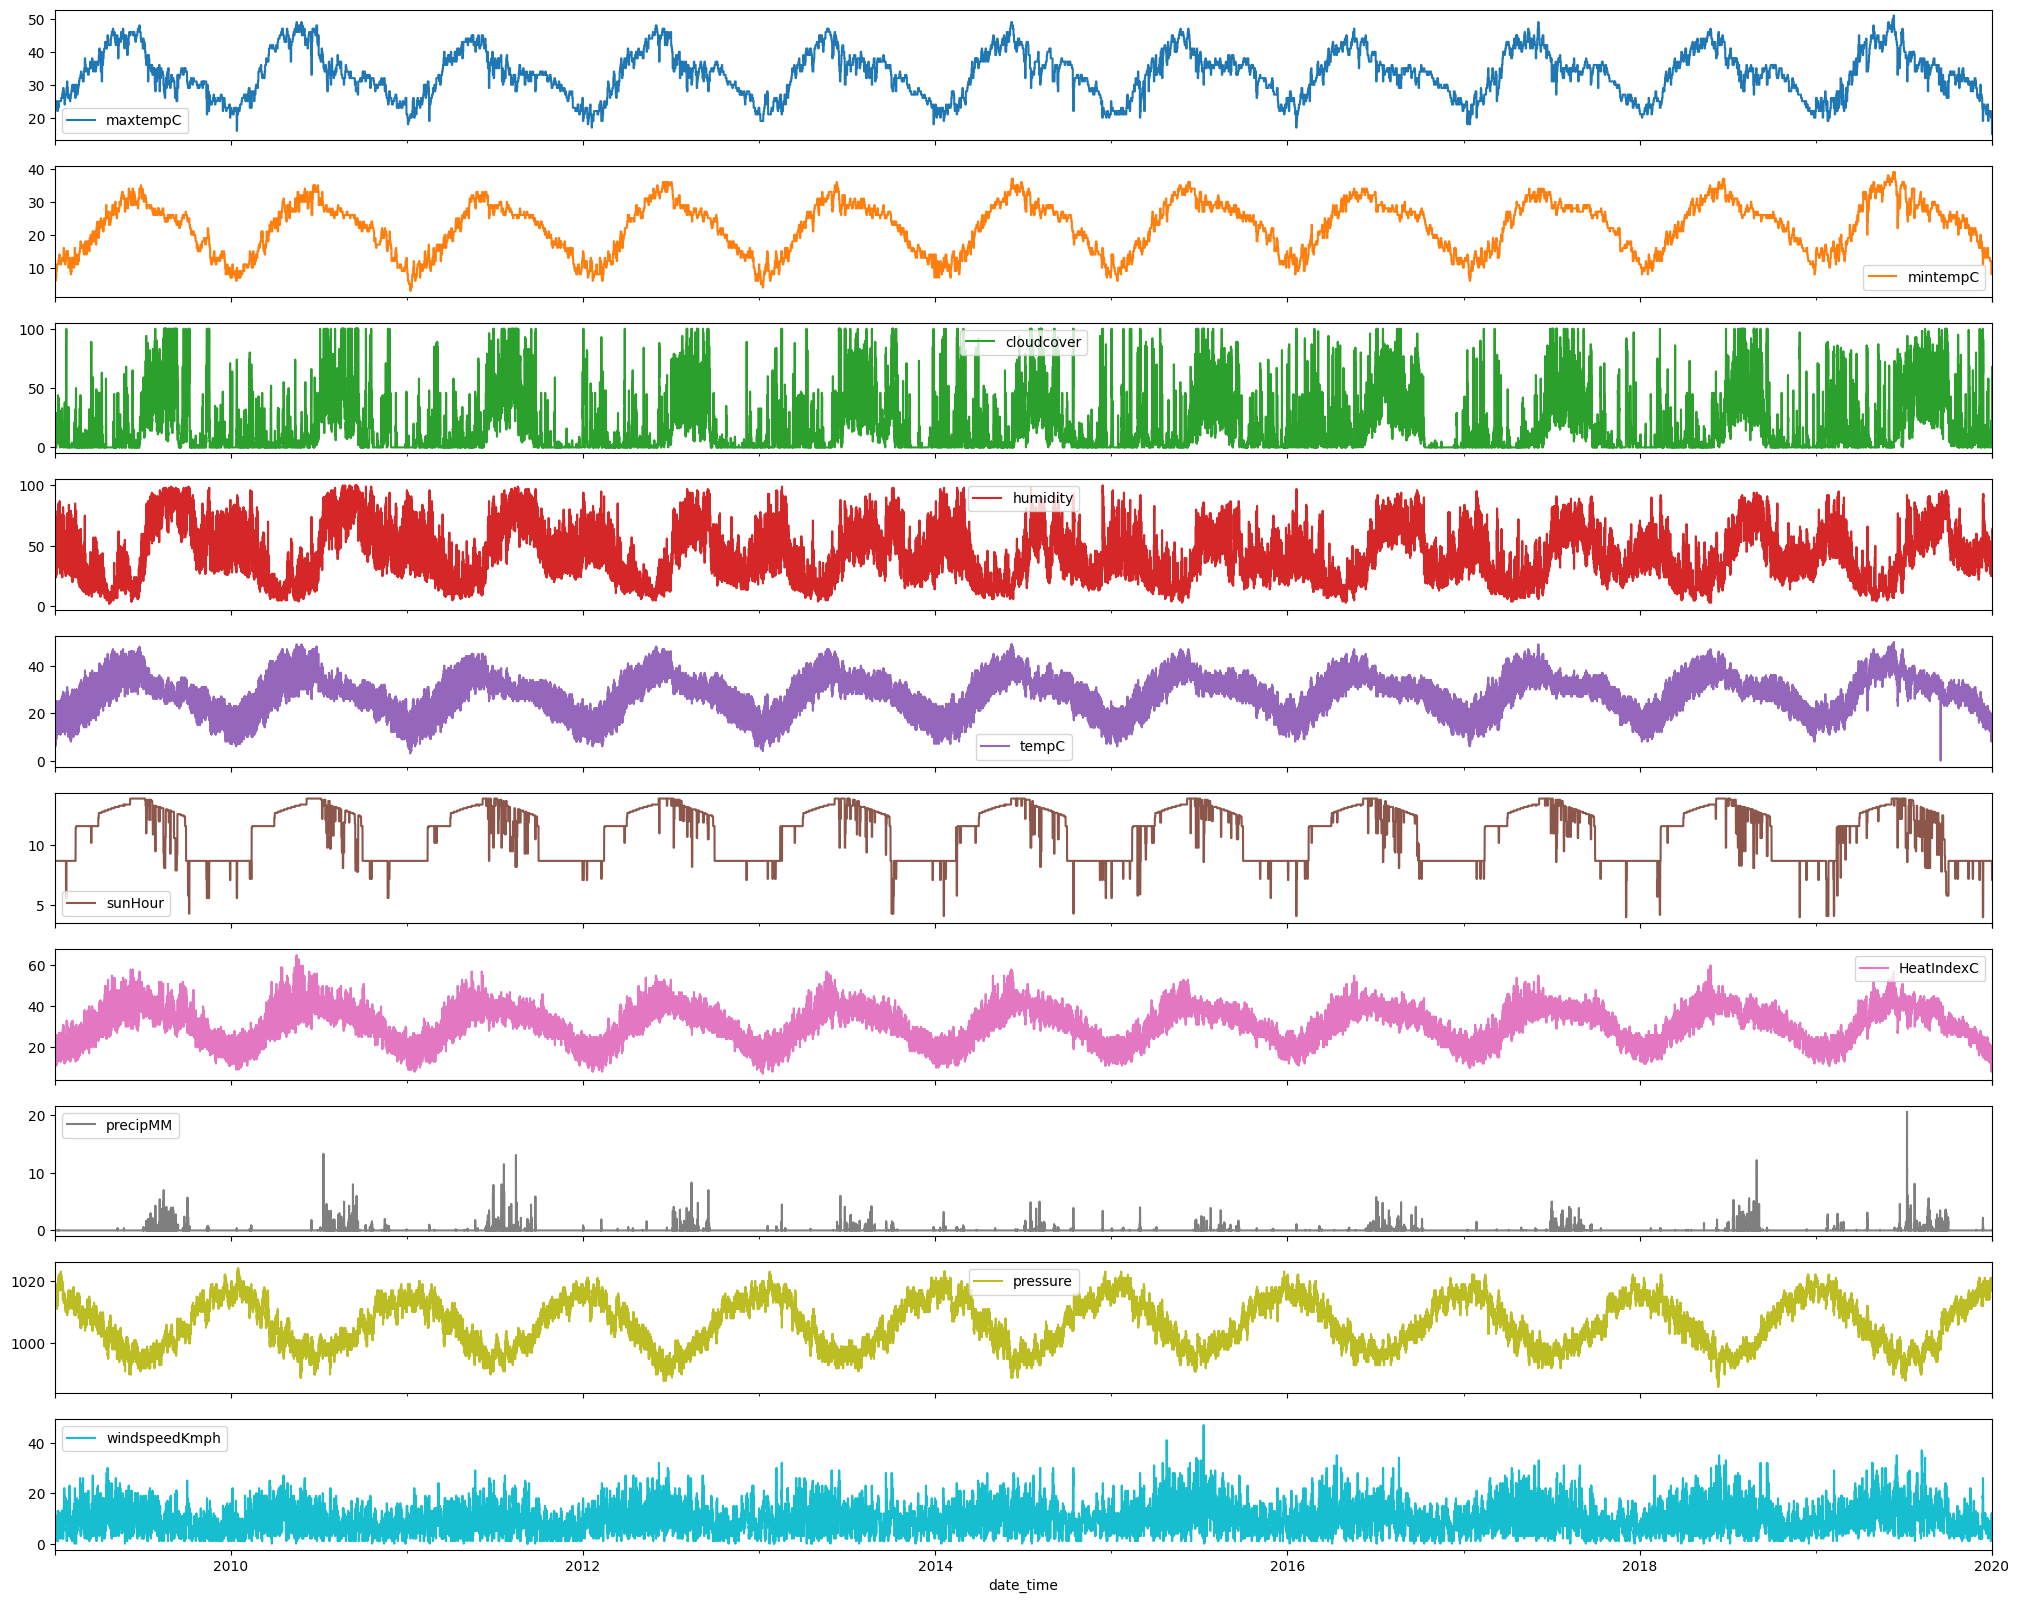

In [11]:

weather_df_num.plot(subplots=True, figsize=(25,20))



array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

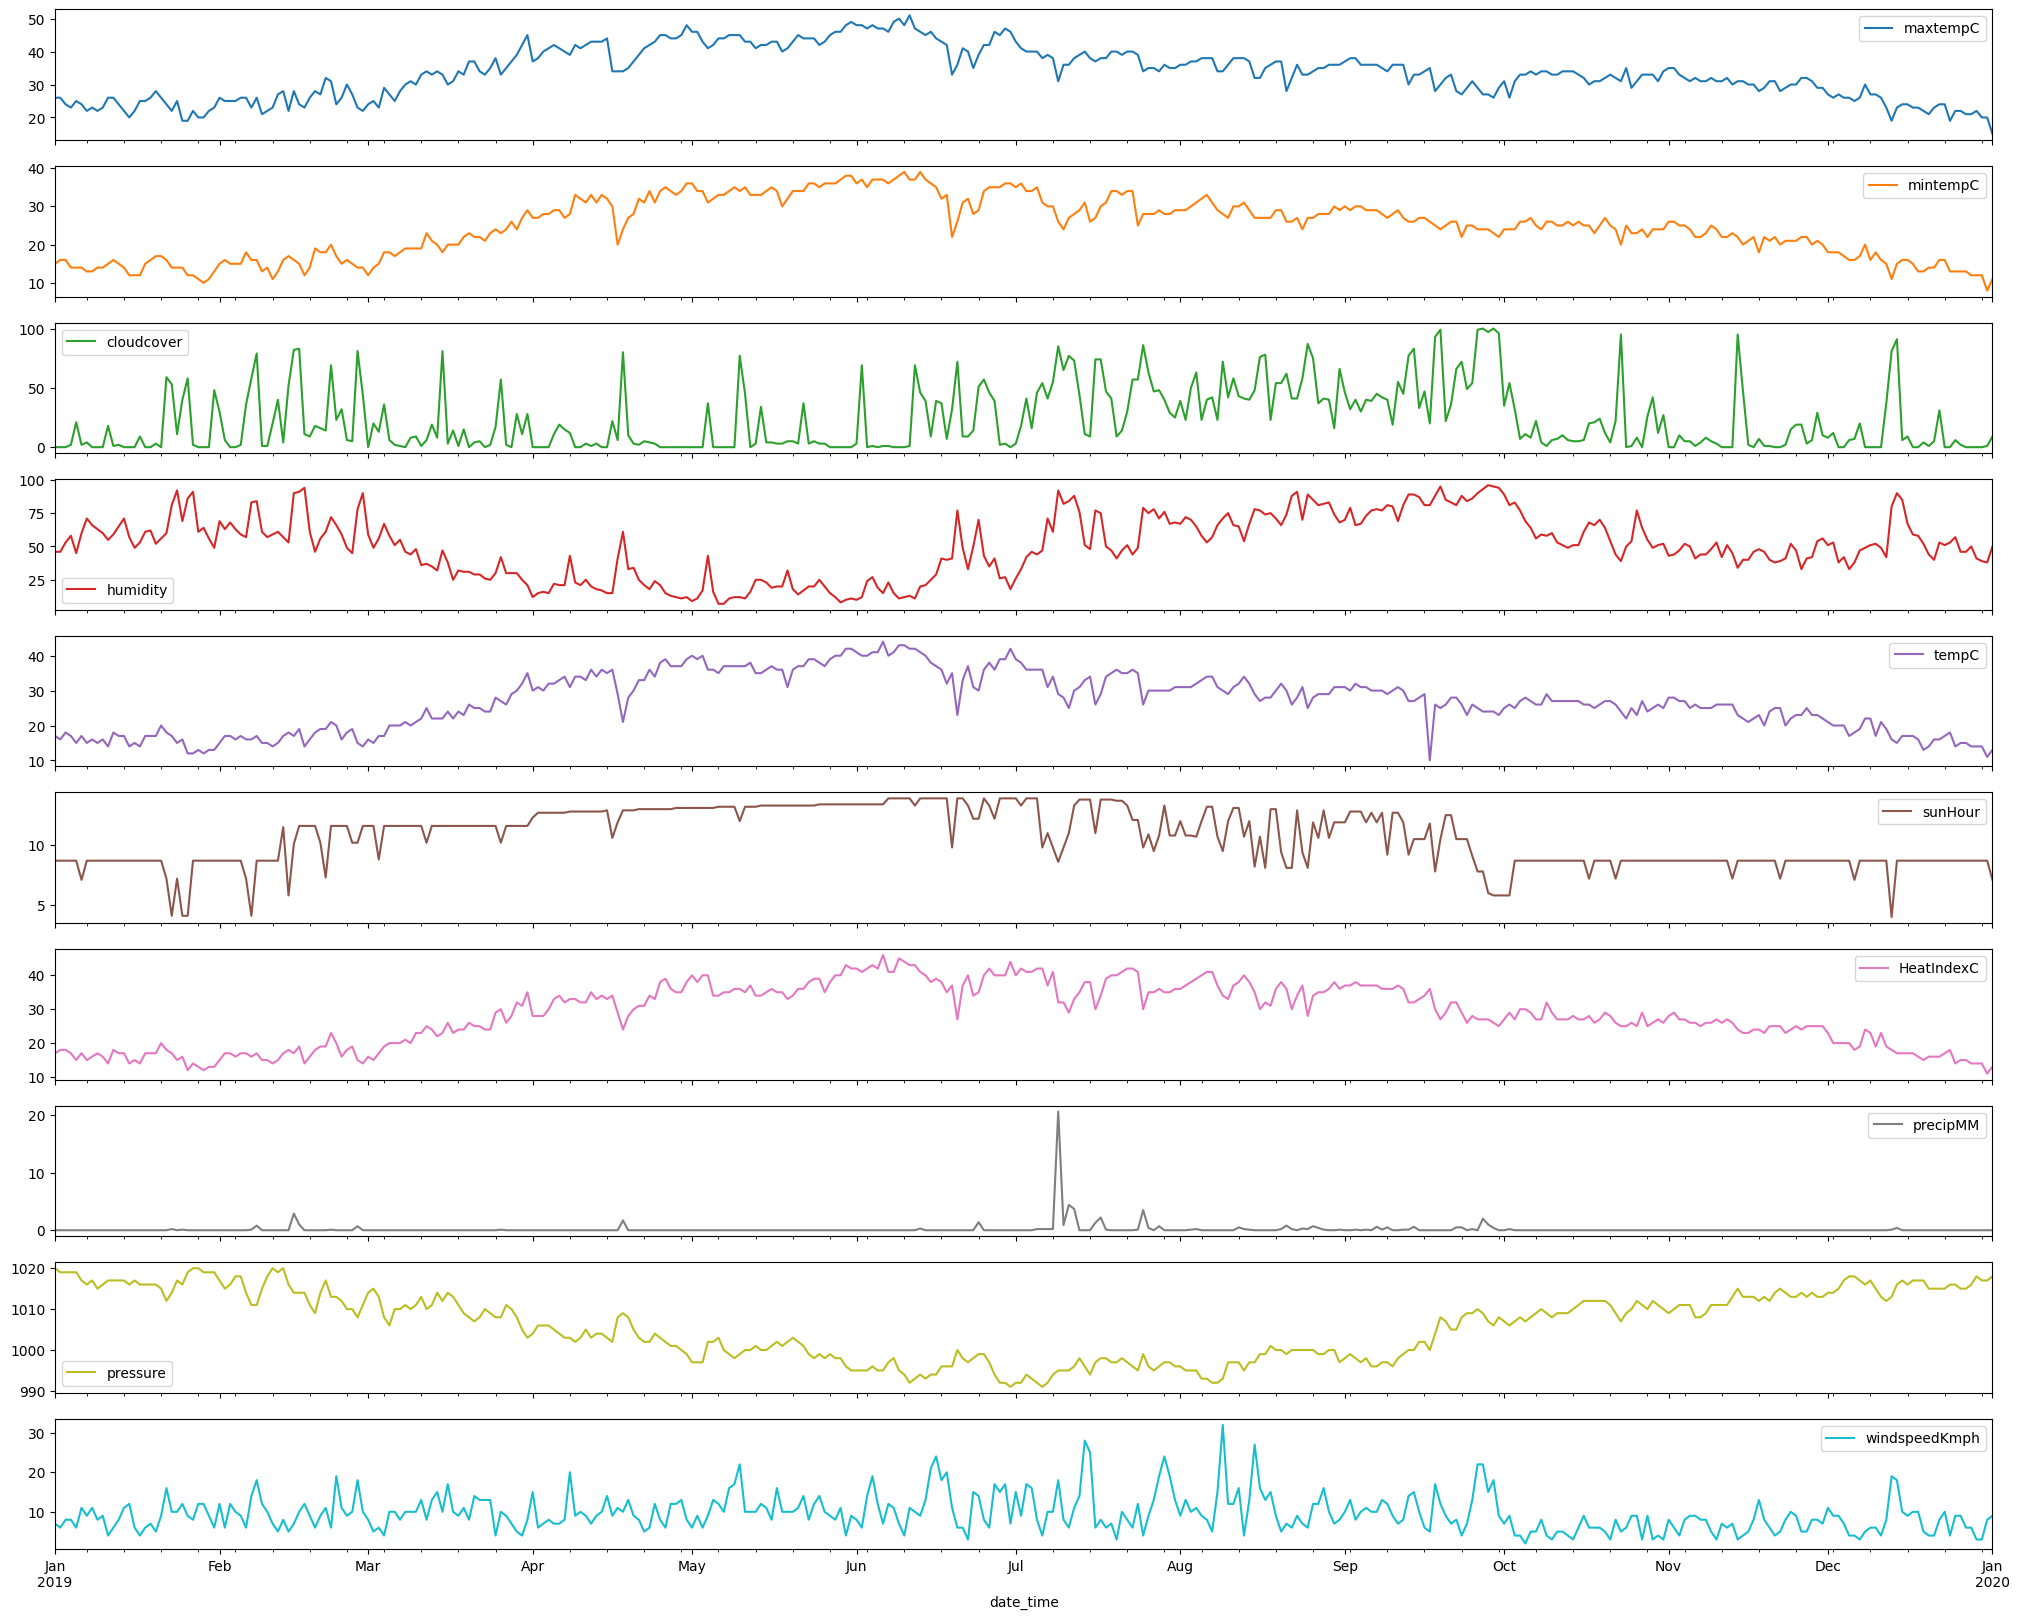

In [12]:
weather_df_num['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))

array([[<Axes: title={'center': 'maxtempC'}>,
        <Axes: title={'center': 'mintempC'}>,
        <Axes: title={'center': 'cloudcover'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'tempC'}>,
        <Axes: title={'center': 'sunHour'}>],
       [<Axes: title={'center': 'HeatIndexC'}>,
        <Axes: title={'center': 'precipMM'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'windspeedKmph'}>, <Axes: >, <Axes: >]],
      dtype=object)

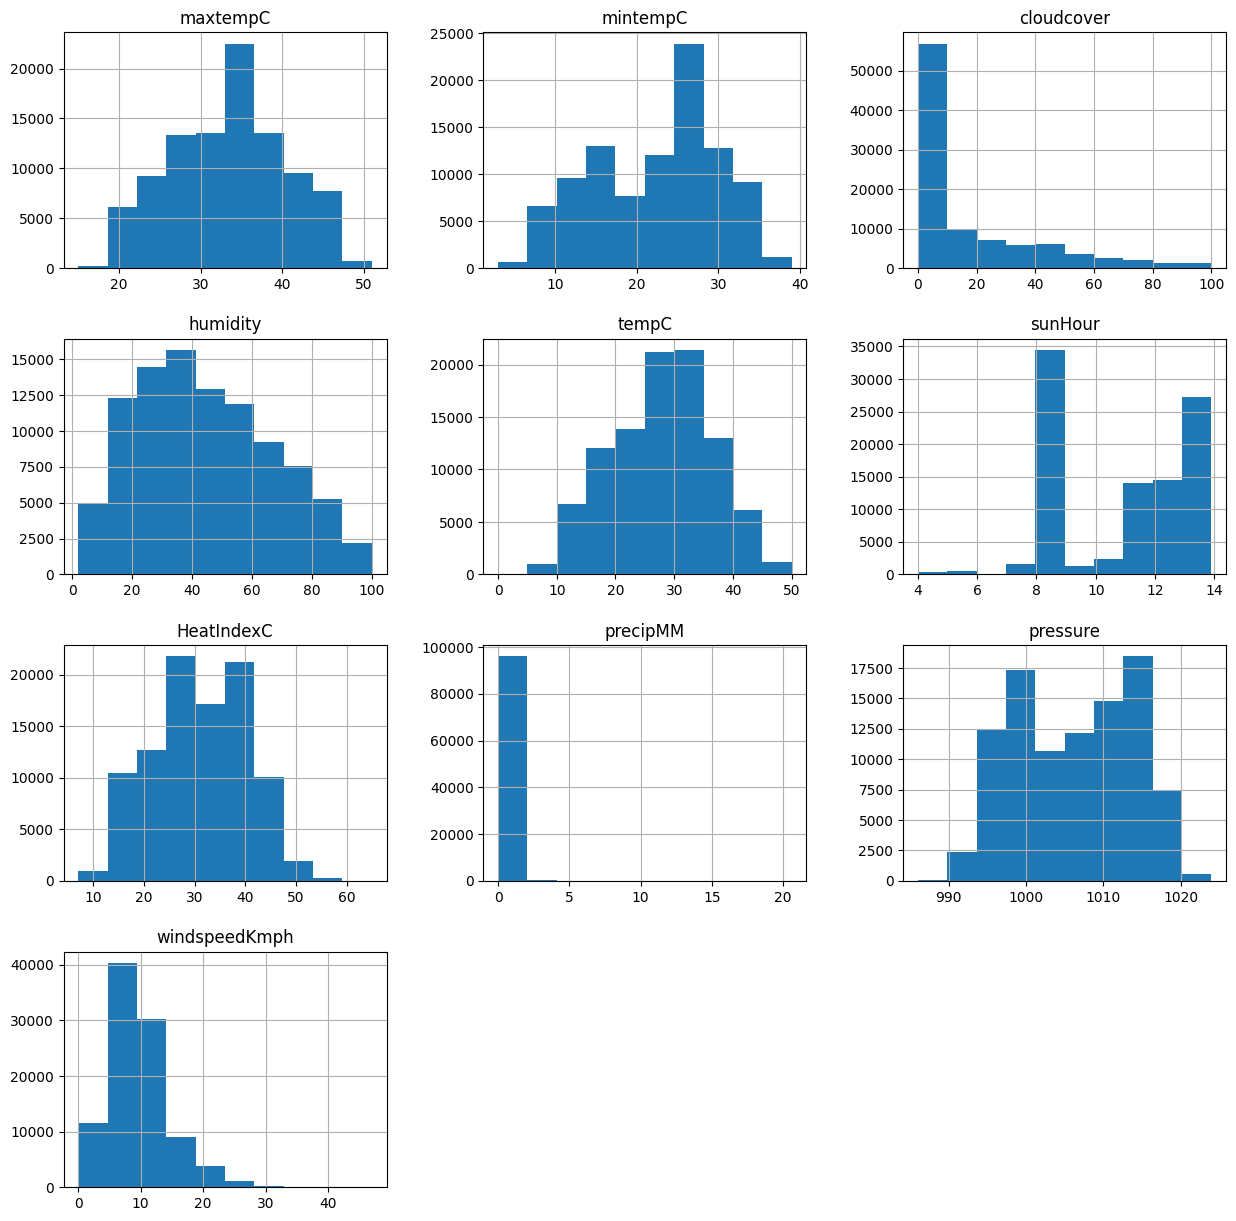

In [13]:

weather_df_num.hist(bins=10,figsize=(15,15))

In [14]:
weth=weather_df_num['2019':'2020']
weth.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2019-01-01 00:00:00,26,15,0,46,17,8.7,17,0.0,1020,7
2019-01-01 01:00:00,26,15,0,46,17,8.7,17,0.0,1019,7
2019-01-01 02:00:00,26,15,0,47,16,8.7,16,0.0,1019,7
2019-01-01 03:00:00,26,15,0,48,16,8.7,16,0.0,1019,6
2019-01-01 04:00:00,26,15,0,48,16,8.7,16,0.0,1019,6


In [27]:
# Rebuild the numeric DataFrame from the original weather_df
weather_df_num = weather_df.loc[:, ['maxtempC', 'mintempC', 'cloudcover', 'humidity',
                                    'tempC', 'sunHour', 'HeatIndexC', 'precipMM',
                                    'pressure', 'windspeedKmph']]

# Now select multiple target columns
weather_y = weather_df_num[['tempC', 'humidity', 'windspeedKmph']]
weather_x = weather_df_num.drop(columns=['tempC', 'humidity', 'windspeedKmph'])


In [31]:

train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [32]:
train_X.shape

(77145, 7)

In [33]:
train_y.shape

(77145, 3)

In [34]:
train_y.head()

,tempC,humidity,windspeedKmph
date_time,,,
2012-03-13 07:00:00,22,62,14
2009-11-05 21:00:00,21,64,6
2017-10-11 22:00:00,30,58,3
2019-06-08 11:00:00,47,12,7
2019-03-06 05:00:00,18,58,11


In [35]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [36]:

predictions = regr.predict(test_X)

np.mean(np.absolute(predictions-test_y))

np.float64(2.8565140407827063)

In [37]:

print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.80


In [39]:
# Convert predictions to DataFrame
pred_df = pd.DataFrame(predictions, columns=['Pred_tempC', 'Pred_humidity', 'Pred_windspeed'])

# Reset index to align with predictions
actual_df = test_y.reset_index(drop=True)
result_df = pd.concat([actual_df, pred_df], axis=1)

# Show differences (optional)
result_df['diff_tempC'] = result_df['tempC'] - result_df['Pred_tempC']
result_df['diff_humidity'] = result_df['humidity'] - result_df['Pred_humidity']
result_df['diff_windspeed'] = result_df['windspeedKmph'] - result_df['Pred_windspeed']

# Display
result_df.head()


,tempC,humidity,windspeedKmph,Pred_tempC,Pred_humidity,Pred_windspeed,diff_tempC,diff_humidity,diff_windspeed
0,34,57,13,32.9600,60.100000,9.830,1.0400,-3.100000,3.170
1,25,46,4,25.6015,43.293167,4.455,-0.6015,2.706833,-0.455
2,34,47,6,33.8500,49.940000,7.620,0.1500,-2.940000,-1.620
3,28,26,11,25.8500,29.410000,9.780,2.1500,-3.410000,1.220
4,28,85,8,28.3700,82.210000,8.050,-0.3700,2.790000,-0.050


In [40]:
import joblib


In [42]:
joblib.dump(regr, 'weather_model.pkl')


['weather_model.pkl']

In [ ]:
loaded_model = joblib.load('weather_model.pkl')
loaded_model.predict(test_X)
